In [4]:
import geopandas as gpd
from pathlib import Path 
import glob

# Original code snippets for reprojecting with geopandas since ogr2ogr gave me the wrong answer

In [3]:
shape = gpd.read_file('polar_3100428970.shp')
shape.crs

<Derived Projected CRS: PROJCS["WGS_84_EPSG_Alaska_Polar_Stereographic",GE ...>
Name: WGS_84_EPSG_Alaska_Polar_Stereographic
Axis Info [cartesian]:
- [south]: Easting (metre)
- [south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
for shp in glob.glob('*.shp'):
    shp = Path(shp)
    shape = gpd.read_file(shp)
    new = shape.to_crs(epsg=5936)
    new.to_file((f'polar_{(shp.stem)}.shp'))
    print(f'Made file polar_{shp.stem}.shp')


Made file polar_8100086980
Made file polar_8100086500
Made file polar_polar_8100086980
Made file polar_polar_3100139900
Made file polar_polar_8100093860
Made file polar_3100133910
Made file polar_polar_7100135340
Made file polar_4100034420
Made file polar_polar_8100089090
Made file polar_polar_3100632300
Made file polar_polar_3100121400
Made file polar_8100197360
Made file polar_4101175820
Made file polar_2100134890
Made file polar_3100489880
Made file polar_8100203300
Made file polar_polar_4100034420
Made file polar_8100089090
Made file polar_3100547800
Made file polar_7100135340
Made file polar_polar_8100211030
Made file polar_polar_3100133910
Made file polar_polar_2100193440
Made file polar_8100211030
Made file polar_7100030490
Made file polar_3100139900
Made file polar_polar_8100197360
Made file polar_polar_7100030490
Made file polar_polar_3100428970
Made file polar_polar_8100086500
Made file polar_polar_4101175820
Made file polar_3100121400
Made file polar_polar_2100134890
Made fi

In [12]:
shp.stem

'polar_3100489880'

# Look at water track occurrence

In [7]:
import os, sys
import numpy as np
from osgeo import gdalnumeric
import pandas as pd

In [12]:
# I can't spell apparently!
df = pd.read_csv('randsom_sheds_state_0.csv')
df.columns


Index(['Unnamed: 0', 'level_0', 'index', 'upa', 'upa_1', 'rivlength', 'relief',
       'aelev_mean', 'aelev_min', 'aelev_max', 'bio12_mean', 'bio12_min',
       'bio12_max', 'ndvi_mean', 'ndvi_min', 'ndvi_max', 'bio01_mean',
       'bio01_min', 'bio01_max', 'SUB_AREA', 'COAST', 'PFAF_ID', 'DIST_MAIN',
       'HYBAS_ID', 'DIST_SINK', 'NEXT_DOWN', 'ORDER', 'ENDO', 'MAIN_BAS',
       'NEXT_SINK', 'SORT', 'UP_AREA', 'long', 'lat', 'geometry', 'elev_mean',
       'elev_min', 'elev_max', 'MAT_C', 'DD', 'in_LGM', 'in_MIS6', 'glaciated',
       'NUM_CODE', 'COMBO', 'RELICT', 'EXTENT', 'CONTENT', 'LANDFORM',
       'bin_map', 'bin_relief', 'bin_map_2', 'bin_relief_2', 'Notes'],
      dtype='object')

In [20]:
data = []

for raster in glob.glob('*_cropped_labels.tif'):
    hybas_id = Path(raster).stem[:10]
    raster_file = gdalnumeric.LoadFile(raster)
    wt_pct = (raster_file == 0).sum() / (raster_file < 2).sum() #there are ghosty class pixels but they are constant across all my rasters
    data.append([hybas_id, wt_pct])

data=pd.DataFrame(data=data, columns=["HYBAS_ID","WT_%"])
    

In [33]:
df.HYBAS_ID = df.HYBAS_ID.astype(int)
data.HYBAS_ID = data.HYBAS_ID.astype(int)
df_data = pd.merge(df, data, on="HYBAS_ID")
df_data

,Unnamed: 0,level_0,index,upa,upa_1,rivlength,relief,aelev_mean,aelev_min,aelev_max,...,RELICT,EXTENT,CONTENT,LANDFORM,bin_map,bin_relief,bin_map_2,bin_relief_2,Notes,WT_%
0,4611,13.0,NaN,78035,8059,0.782817,220.479713,206.610191,93.998528,314.478241,...,NaN,Continuous,h,NaN,3,3,0,1,done,0.003138
1,3426,0.0,NaN,39683,4837,0.426567,417.885841,101.814080,-0.113228,417.772613,...,NaN,Continuous,l,f,3,6,0,2,done,0.257703
2,3522,0.0,NaN,39467,4130,0.477369,758.131836,217.037468,7.758362,765.890198,...,NaN,Continuous,l,r,3,12,0,3,done,0.135918
3,3091,0.0,NaN,48186,5626,0.462786,1022.554665,421.747592,126.512108,1149.066772,...,NaN,Continuous,l,r,3,16,0,4,done,0.577211
4,8860,45.0,NaN,30431,3595,0.539363,92.163116,100.544588,54.495056,146.658173,...,NaN,Continuous,l,r,5,1,1,0,done,0.470721
5,33004,25.0,NaN,70369,7425,0.590104,204.963808,62.926031,23.833952,228.797760,...,NaN,Continuous,h,NaN,4,3,1,1,done,0.305767
6,30661,167.0,NaN,47712,6374,0.623116,597.162415,490.839701,345.735901,942.898315,...,NaN,Continuous,l,r,5,9,1,2,done,0.543870
7,35282,118.0,NaN,65116,6297,0.629896,687.141754,760.008653,469.107513,1156.249268,...,NaN,Continuous,l,r,5,10,1,3,done,0.485152
8,3258,55.0,NaN,45539,3867,0.592519,947.888916,753.214157,387.723633,1335.612549,...,NaN,Discontinuous,l,r,6,15,1,4,done,0.000000
9,77183,NaN,NaN,29399,3099,NaN,324.000000,NaN,NaN,NaN,...,NaN,Isolated,l,r,9,5,2,1,done,0.015128


<AxesSubplot: xlabel='MAT_C', ylabel='WT_%'>

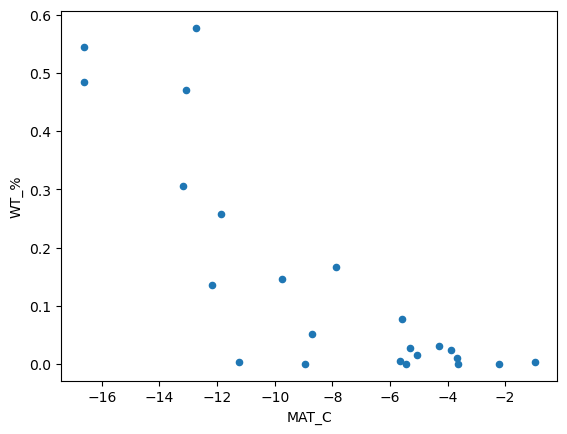

In [44]:
df_data.plot.scatter('MAT_C','WT_%')

# Polygonize the water track occurrence for export into GEE

In [79]:
import rasterio
from rasterio.features import shapes

wt_polys = gpd.GeoDataFrame()

for raster in glob.glob('*_cropped_labels.tif'):
    mask = None
    with rasterio.Env():
        with rasterio.open(raster) as src:
            image = src.read(1) # first band
            results = (
            {'properties': {'wt_occurrence': v}, 'geometry': s}
            for i, (s, v) 
            in enumerate(
                shapes(image, mask=mask, transform=src.transform)))
            
            #print(f'Done raster stuff with {raster}')

    geoms = list(results)

    gpd_polygonized_raster  = gpd.GeoDataFrame.from_features(geoms)

    gpd_polygonized_raster = gpd_polygonized_raster.dissolve(by='wt_occurrence')

    gpd_polygonized_raster["HYBAS_ID"] = int(Path(raster).stem[:10])

    wt_polys = wt_polys.append(gpd_polygonized_raster)

wt_polys = wt_polys.reset_index()

/scratch/ipykernel_53617/65535699.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wt_polys = wt_polys.append(gpd_polygonized_raster)
/scratch/ipykernel_53617/65535699.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wt_polys = wt_polys.append(gpd_polygonized_raster)
/scratch/ipykernel_53617/65535699.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wt_polys = wt_polys.append(gpd_polygonized_raster)
/scratch/ipykernel_53617/65535699.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wt_polys = wt_polys.append(gpd_polygonized_raster)
/scratch/ipykernel_53617/65535699.py:27: FutureWarning: The frame.append method is deprecate

In [90]:
wt_polys["HYBAS_ID"].unique()

array([2100193440, 3100428970, 8100086500, 3100489880, 8100203300,
       3100632300, 7100215390, 3100845890, 3100547800, 2100134890,
       4100034420, 3100133910, 7100030490, 8100086980, 3100602320,
       8100089090, 7100135340, 8100211030, 8100197360, 3100121400,
       3100139900, 4101175820, 8100093860])

In [85]:
# A wee bit of cleaning

wt_polys = wt_polys.loc[wt_polys['wt_occurrence'] != 255.0] # NoData 
wt_polys = wt_polys.loc[wt_polys['wt_occurrence'] != 2.0] # Ghosties
wt_polys['wt_occurrence']= wt_polys['wt_occurrence'].astype(int)
wt_polys = wt_polys.set_crs(epsg=5936)
wt_polys

,wt_occurrence,geometry,HYBAS_ID
0,0,"MULTIPOLYGON (((2956900.000 4940370.000, 29568...",2100193440
1,1,"MULTIPOLYGON (((2956020.000 4941040.000, 29560...",2100193440
4,0,"MULTIPOLYGON (((-1456540.000 2162680.000, -145...",3100428970
5,1,"MULTIPOLYGON (((-1452660.000 2162840.000, -145...",3100428970
8,0,"MULTIPOLYGON (((2197940.000 -273240.000, 21979...",8100086500
9,1,"MULTIPOLYGON (((2197750.000 -272940.000, 21977...",8100086500
12,0,"MULTIPOLYGON (((-1590670.000 2730330.000, -159...",3100489880
13,1,"MULTIPOLYGON (((-1591340.000 2736340.000, -159...",3100489880
16,1,"POLYGON ((2306010.000 -914330.000, 2306220.000...",8100203300
18,0,"MULTIPOLYGON (((-2212680.000 2811810.000, -221...",3100632300


In [129]:
wt_polys.loc[wt_polys['HYBAS_ID'] == 4101175820]

,wt_occurrence,geometry,HYBAS_ID,color
78,1,"POLYGON ((-2194950.000 969020.000, -2194910.00...",4101175820,red


In [125]:
df_data.loc[df_data['HYBAS_ID'] == 4101175820]



,Unnamed: 0,level_0,index,upa,upa_1,rivlength,relief,aelev_mean,aelev_min,aelev_max,...,RELICT,EXTENT,CONTENT,LANDFORM,bin_map,bin_relief,bin_map_2,bin_relief_2,Notes,WT_%
22,91302,NaN,NaN,33324,2861,NaN,892.0,NaN,NaN,NaN,...,NaN,Discontinuous,l,r,19,14,4,4,lobes?,0.0


In [128]:
for raster in glob.glob('4101175820*.tif'):
    hybas_id = Path(raster).stem[:10]
    raster_file = gdalnumeric.LoadFile(raster)
    print(f'{(raster_file == 0).sum()} zeroes and {(raster_file == 1).sum()} ones')

2097152 zeroes and 4456448 ones
0 zeroes and 2151463 ones


In [119]:
wt_dict = {
    0: "blue",
    1: "red"
    }
wt_polys['color'] = wt_polys['wt_occurrence'].map(wt_dict)


In [131]:
import matplotlib.pyplot as plt
id =4101175820
# for id in wt_polys["HYBAS_ID"].unique():
fig, ax = plt.subplots(dpi=300)
pic = wt_polys.loc[wt_polys["HYBAS_ID"] == id].plot(
        'wt_occurrence',
        color=wt_polys['color'], 
        ax=ax
        )
print(wt_polys['color'].loc[wt_polys['HYBAS_ID']==id])

    # for ctype, data in wt_polys.groupby('wt_occurrence'):
    #     picture = wt_polys.loc[wt_polys["HYBAS_ID"] == id].plot(
    #         'wt_occurrence',
    #         facecolor=wt_dict[ctype],
    #         ax=ax
    #         )
plt.title(f'{id}')
# plt.savefig(f'{id}_polygons.png')
plt.close()


78    red
Name: color, dtype: object


/dartfs-hpc/rc/home/1/f005dv1/.conda/envs/gee/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


In [114]:
wt_dict[ctype]

'blue'

In [87]:
wt_polys.to_file('wt_polys.shp')
wt_polys.to_file('wt_polys.geojson')

wt_polys.to_crs(epsg=4326).to_file('wt_polys_4326.shp') #for EE

/scratch/ipykernel_53617/1059532131.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  wt_polys.to_file('wt_polys.shp')
/scratch/ipykernel_53617/1059532131.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  wt_polys.to_crs(epsg=4326).to_file('wt_polys_4326.shp')


# Some werid stuff happens when u do the conversion where you get a ghost extra class

In [11]:
for raster in glob.glob('*_cropped_labels.tif'):
    hybas_id = Path(raster).stem[:10]
    raster_file = gdalnumeric.LoadFile(raster)
    pixel_count_2= (raster_file == 2)
    print(f'{hybas_id} has {pixel_count_0} pixels from class 2')

2100193440 has 7928 pixels from class 2
3100428970 has 7928 pixels from class 2
8100086500 has 7928 pixels from class 2
3100489880 has 7928 pixels from class 2
8100203300 has 7928 pixels from class 2
3100632300 has 7928 pixels from class 2
7100215390 has 7928 pixels from class 2
3100845890 has 7928 pixels from class 2
3100547800 has 7928 pixels from class 2
2100134890 has 7928 pixels from class 2
4100034420 has 7928 pixels from class 2
3100133910 has 7928 pixels from class 2
7100030490 has 7928 pixels from class 2
8100086980 has 7928 pixels from class 2
3100602320 has 7928 pixels from class 2
8100089090 has 7928 pixels from class 2
7100135340 has 7928 pixels from class 2
8100211030 has 7928 pixels from class 2
8100197360 has 7928 pixels from class 2
3100121400 has 7928 pixels from class 2
3100139900 has 7928 pixels from class 2
4101175820 has 7928 pixels from class 2
8100093860 has 7928 pixels from class 2
